# Memprediksi dan Menganalisis Penjualan Barang Terlaris Menggunakan Metode Naive Bayes dan K-Means

# Disusun Oleh:
Nama : Muhamad Azriel Yanuar

Nim : A11.2022.14646

Kelas : Pembelajaran Mesin A11.2022.14646

# Ringkasan

Penelitian ini bertujuan untuk menganalisis dan memprediksi penjualan barang terlaris menggunakan dua metode pembelajaran mesin: Naive Bayes dan K-Means. Dengan memanfaatkan dataset penjualan hijab, penelitian ini berfokus pada identifikasi barang yang paling laris serta memprediksi barang yang kemungkinan besar akan menjadi laris di bulan berikutnya.

Penelitian ini menggunakan dataset penjualan yang berisi informasi tentang berbagai barang hijab, termasuk tanggal penjualan, kode barang, nama barang, kategori, desain, harga jual, harga beli, dan laba. Dua algoritma pembelajaran mesin diterapkan dalam penelitian ini:

1. Naive Bayes: Digunakan untuk memprediksi barang yang akan terjual berdasarkan fitur seperti kode barang dan bulan penjualan.
2. K-Means: Digunakan untuk mengelompokkan barang-barang berdasarkan pola penjualan untuk mengidentifikasi kelompok barang yang memiliki pola penjualan serupa.

# Masalah dan Tujuan Penelitian

Masalah dan Tujuan Penelitian

Masalah

Di dalam industri retail, memahami pola penjualan dan mampu memprediksi barang-barang yang akan terjual dengan baik di masa depan adalah tantangan yang signifikan. Tanpa prediksi yang akurat, perusahaan mungkin menghadapi masalah seperti kelebihan stok untuk barang yang kurang diminati atau kekurangan stok untuk barang yang sangat diminati. Masalah ini dapat menyebabkan kerugian finansial, ketidakpuasan pelanggan, dan inefisiensi operasional. Oleh karena itu, diperlukan metode yang efektif untuk menganalisis data penjualan historis dan membuat prediksi yang akurat tentang barang-barang yang akan terlaris di bulan berikutnya.

Tujuan

Penelitian ini bertujuan untuk mengatasi masalah tersebut dengan mengaplikasikan dua metode pembelajaran mesin, yaitu Naive Bayes dan K-Means, untuk menganalisis dan memprediksi penjualan barang terlaris. Secara khusus, tujuan dari penelitian ini adalah:

1. Memprediksi Barang Terlaris:

Menggunakan algoritma Naive Bayes untuk memprediksi barang-barang yang kemungkinan besar akan menjadi terlaris di bulan berikutnya berdasarkan data penjualan historis.

2. Mengelompokkan Barang Berdasarkan Pola Penjualan:

Menggunakan algoritma K-Means untuk mengelompokkan barang-barang ke dalam beberapa kelompok berdasarkan pola penjualan mereka. Ini membantu dalam mengidentifikasi strategi penjualan yang berbeda untuk setiap kelompok.

3. Mengevaluasi dan Membandingkan Performa Metode:

Mengevaluasi akurasi prediksi dari Naive Bayes menggunakan metrik akurasi, matriks kebingungan, dan laporan klasifikasi.
Mengevaluasi hasil pengelompokan K-Means menggunakan skor siluet sebagai proxy untuk akurasi.
Membandingkan hasil dari kedua metode untuk menentukan mana yang lebih efektif dalam konteks prediksi penjualan barang terlaris.

4. Visualisasi Hasil:

Membuat visualisasi yang informatif untuk menampilkan prediksi barang terlaris bulan depan dan perbandingan antara hasil dari Naive Bayes dan K-Means.

# Model/Alur Penyelesaian

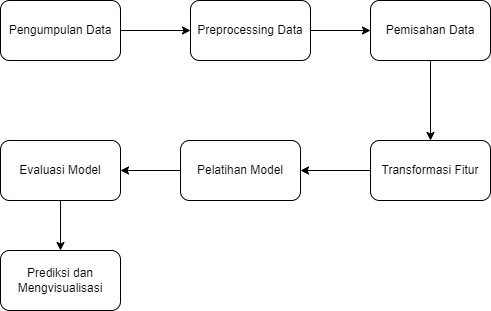

# Mengimport Libraries

- pandas dan numpy : untuk manipulasi data.
- matplotlib.pyplot dan seaborn : untuk visualisasi data.
- sklearn :  untuk algoritma machine learning, pemisahan data, dan evaluasi model.
- collections.Counter : untuk menghitung kemunculan elemen dalam daftar.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter

# Penjelasan Dataset

Dataset ini menyediakan informasi komprehensif mengenai penjualan barang-barang hijab, termasuk data tanggal transaksi, detail produk, harga, dan laba. Transformasi dan analisis data yang dilakukan memberikan wawasan berharga tentang pola penjualan, yang dapat digunakan untuk strategi bisnis dan pengambilan keputusan yang lebih baik.

# Exploratory Data Analysis (EDA)

# 1. Memuat/Memanggil Dataset

Memanggil Dataset

In [4]:
filelocation = '../uas_ml/dataset/dataset_hijab.xlsx'
df_jual = pd.read_excel(filelocation, sheet_name='laporan penjualan', skiprows=3)

# 2. Deskripsi dataset

Melihat Dataset

In [5]:
df_jual

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0
...,...,...,...,...,...,...,...,...,...
465,465.0,2024-02-16,H-18,BERGO INSTAN VOAL,HIJAB,POLOS,70000.0,90000.0,20000.0
466,466.0,2024-02-16,H-02,PASMINA SILK LASERCUT,HIJAB,POLOS,115000.0,130000.0,15000.0
467,467.0,2024-02-16,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
468,468.0,2024-02-16,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0


# 3. Mengganti nama kolom

Dalam hal ini, nama kolom tidak diubah, namun ditulis ulang untuk memastikan semua kolom yang diperlukan telah diidentifikasi dengan benar.

In [6]:
df_jual = df_jual.rename(columns={
    'NO': 'NO',
    'TANGGAL': 'TANGGAL',
    'KODE': 'KODE',
    'NAMA BARANG': 'NAMA BARANG',
    'KATEGORI': 'KATEGORI',
    'DESAIN': 'DESAIN',
    'HARGA JUAL': 'HARGA JUAL',
    'HARGA BELI': 'HARGA BELI',
    'LABA': 'LABA'
})

# 4. Menghilangkan Baris tidak terdeteksi

menghapus baris yang memiliki nilai NO yang hilang (NaN). dropna(subset=['NO']) memastikan bahwa hanya baris dengan nilai NO yang lengkap yang akan dipertahankan dalam dataset.

In [7]:
df_jual = df_jual.dropna(subset=['NO'])

# 5. menampilkan dataset yang sudah diubah

In [8]:
df_jual

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0
5,5.0,2024-02-01,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
...,...,...,...,...,...,...,...,...,...
465,465.0,2024-02-16,H-18,BERGO INSTAN VOAL,HIJAB,POLOS,70000.0,90000.0,20000.0
466,466.0,2024-02-16,H-02,PASMINA SILK LASERCUT,HIJAB,POLOS,115000.0,130000.0,15000.0
467,467.0,2024-02-16,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0
468,468.0,2024-02-16,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0


# 6. Menganalisi menggunakan Bulan

mengonversi kolom TANGGAL menjadi format datetime dan mengekstrak bulan dari tanggal tersebut. Bulan yang diekstrak disimpan dalam kolom baru BULAN.

In [9]:
df_jual['TANGGAL'] = pd.to_datetime(df_jual['TANGGAL'])
df_jual['BULAN'] = df_jual['TANGGAL'].dt.month

# 7. Menambah Tabel jumlah yang di beli

In [10]:
df_laris = df_jual.groupby(['KODE', 'NAMA BARANG']).size().reset_index(name='COUNT')
df_laris = df_laris.sort_values(by='COUNT', ascending=False)

In [11]:
top_10_laris = df_laris.head(10)
print("Top 10 Barang Terlaris:")
print(top_10_laris)


Top 10 Barang Terlaris:
    KODE          NAMA BARANG  COUNT
35  H-30     SEGITIGA DIAMOND     46
0   A-01               PENITI     37
1   A-02               CHIPUT     37
24  H-18    BERGO INSTAN VOAL     36
7   H-01         PASMINA OVAL     32
27  H-21       SEGIEMPAT VOAL     27
17  H-11        PASMINA VOAL      22
32  H-27        SEGITIGA VOAL     15
15  H-09  PASMINA SNOWCHIFFON     14
25  H-19   BERGO INSTAN CREPE     13


# 8. Data Exploration

melakukan eksplorasi data:

- describe : memberikan statistik deskriptif dari dataset.
- info : memberikan informasi tentang tipe data dan jumlah nilai non-null.
- sns.countplot : digunakan untuk membuat plot distribusi penjualan per bulan.


Deskripsi Data:
               NO                        TANGGAL     HARGA JUAL  \
count  469.000000                            469     469.000000   
mean   235.000000  2024-02-08 06:36:04.605543680   61731.343284   
min      1.000000            2024-02-01 00:00:00    4000.000000   
25%    118.000000            2024-02-04 00:00:00   30000.000000   
50%    235.000000            2024-02-08 00:00:00   60000.000000   
75%    352.000000            2024-02-12 00:00:00   80000.000000   
max    469.000000            2024-02-16 00:00:00  130000.000000   
std    135.532899                            NaN   37209.563300   

          HARGA BELI          LABA  BULAN  
count     469.000000    469.000000  469.0  
mean    76503.198294  14771.855011    2.0  
min      5000.000000   1000.000000    2.0  
25%     40000.000000  10000.000000    2.0  
50%     80000.000000  15000.000000    2.0  
75%    100000.000000  20000.000000    2.0  
max    150000.000000  20000.000000    2.0  
std     41617.028001   5603

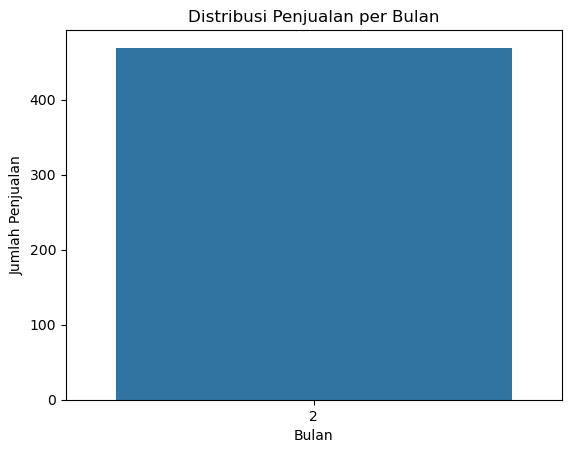

In [12]:
print("\nDeskripsi Data:")
print(df_jual.describe())

print("\nInformasi Data:")
print(df_jual.info())

print("\nDistribusi Penjualan per Bulan:")
sns.countplot(x='BULAN', data=df_jual)
plt.title('Distribusi Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.show()

# 9. Feature Engineering for K-Means

mengkodekan kolom KODE menjadi nilai numerik menggunakan LabelEncoder untuk digunakan sebagai fitur dalam model K-Means.

In [13]:
label_encoder = LabelEncoder()
df_jual['KODE'] = label_encoder.fit_transform(df_jual['KODE'])

# 10. Normalize Features

memisahkan dataset menjadi fitur (KODE dan BULAN) dan menormalkan fitur tersebut menggunakan StandardScaler.

In [14]:
X = df_jual[['KODE', 'BULAN']]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 11. Determine Optimal Clusters Using Elbow Method

menggunakan metode Elbow untuk menentukan jumlah cluster optimal dengan memplot nilai inertia untuk berbagai jumlah cluster. Inertia adalah total jarak dari titik ke pusat cluster terdekatnya.

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

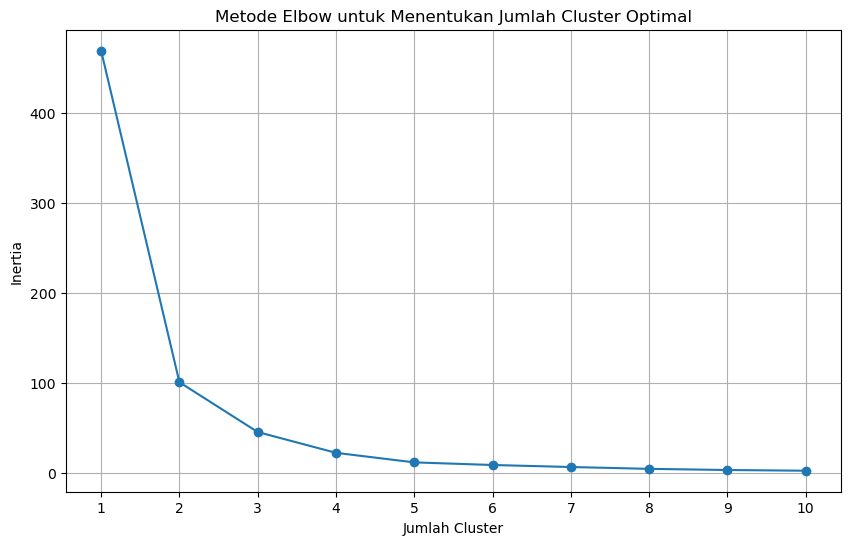

In [15]:
inertia_scores = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia_scores, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# 12. Determine Optimal Clusters Using Silhouette Score

menggunakan nilai silhouette score untuk menentukan jumlah cluster optimal. Silhouette score mengukur seberapa mirip suatu titik dengan cluster-nya sendiri dibandingkan dengan cluster lain. Nilai optimal adalah jumlah cluster dengan nilai silhouette score tertinggi.

In [16]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters for K-Means: {optimal_clusters}')

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, wh

Optimal number of clusters for K-Means: 10


# 13. Train K-Means Model and Assign Clusters

melatih model K-Means dengan jumlah cluster optimal dan menetapkan label cluster ke setiap baris data.

In [17]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

df_jual['CLUSTER'] = kmeans.labels_

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# 14. Visualisasi Hasil Clustering

membuat scatter plot untuk visualisasi hasil clustering. Setiap titik pada plot mewakili satu baris data, dengan warna berbeda untuk setiap cluster.

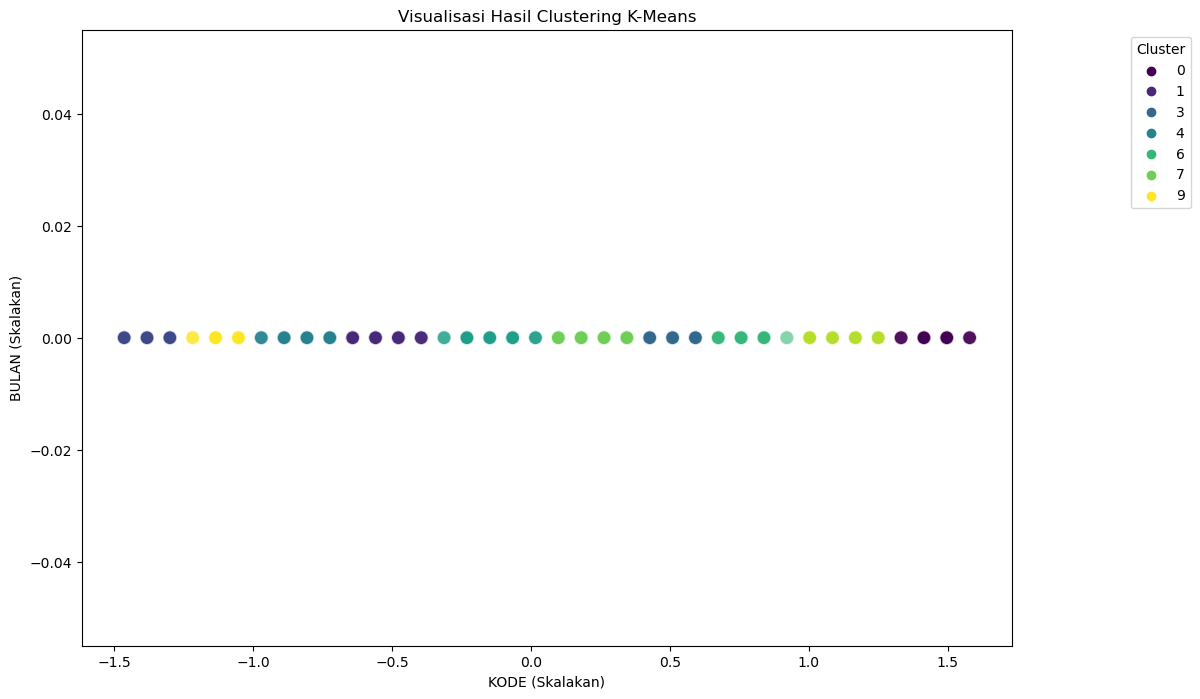

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_jual['CLUSTER'], palette='viridis', s=100, alpha=0.6)
plt.title('Visualisasi Hasil Clustering K-Means')
plt.xlabel('KODE (Skalakan)')
plt.ylabel('BULAN (Skalakan)')
plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

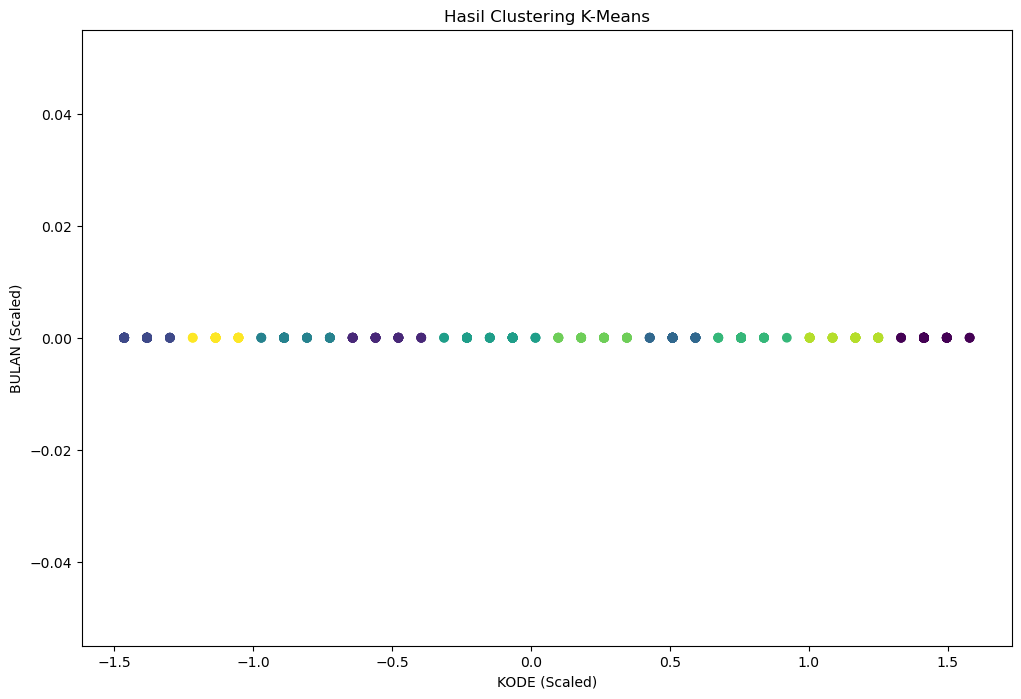

In [30]:
plt.figure(figsize=(12, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('KODE (Scaled)')
plt.ylabel('BULAN (Scaled)')
plt.title('Hasil Clustering K-Means')
plt.show()


# 15.Performa Model K-means

In [31]:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.7239867752659307


# 16. Feature Engineering for Naive Bayes

mengkodekan kolom NAMA BARANG menjadi nilai numerik menggunakan LabelEncoder untuk digunakan sebagai label dalam model Naive Bayes.

In [33]:
df_jual['NAMA BARANG'] = label_encoder.fit_transform(df_jual['NAMA BARANG'])

# 17. Split Data and Train Naive Bayes Model

membagi dataset menjadi fitur dan label, kemudian memisahkannya menjadi set pelatihan dan pengujian. Model Naive Bayes dilatih menggunakan data pelatihan.

In [34]:
X_nb = df_jual[['KODE', 'BULAN']]
y_nb = df_jual['NAMA BARANG']

# Split data into training and test sets for Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

# 18. Evaluate Naive Bayes Model

melakukan prediksi menggunakan model Naive Bayes yang telah dilatih, kemudian mengevaluasi kinerja model dengan menghitung akurasi dan menampilkan laporan klasifikasi serta matriks kebingungan.


Akurasi Model Naive Bayes: 0.41134751773049644

Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        13
           7       0.80      1.00      0.89        12
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          18       0.41      1.00      0.59        12
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2

C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\azriel17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


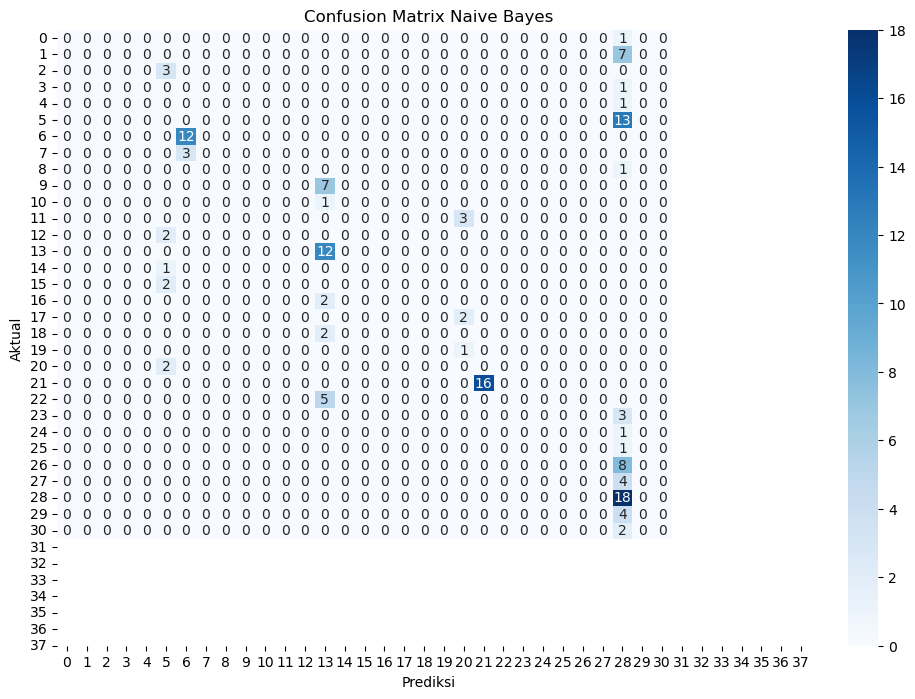

In [35]:
# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate Naive Bayes model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAkurasi Model Naive Bayes: {accuracy}')
print('\nLaporan Klasifikasi Naive Bayes:')
print(classification_report(y_test, y_pred))

# Confusion matrix for Naive Bayes
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

# 19. Predict for Next Month Using K-Means

memprediksi barang terlaris untuk bulan depan menggunakan model K-Means. Data bulan depan diskalakan dan di-cluster-kan menggunakan model K-Means yang sudah dilatih. Barang yang paling sering muncul di setiap cluster ditentukan sebagai prediksi.

In [36]:
next_month = 3
df_next_month = df_jual[['KODE']].drop_duplicates()
df_next_month['BULAN'] = next_month

# Scale the next month's data
X_next_month = scaler.transform(df_next_month[['KODE', 'BULAN']])
df_next_month['CLUSTER'] = kmeans.predict(X_next_month)

# Determine the most frequent items in each cluster
cluster_predictions = []
for cluster in range(optimal_clusters):
    items_in_cluster = df_jual[df_jual['CLUSTER'] == cluster]['NAMA BARANG']
    most_common_item = Counter(items_in_cluster).most_common(1)[0][0]
    cluster_predictions.append(most_common_item)

df_next_month['PREDIKSI_KMEANS'] = df_next_month['CLUSTER'].apply(lambda x: cluster_predictions[x])

# 20. Predict for Next Month Using Naive Bayes

memprediksi barang terlaris untuk bulan depan menggunakan model Naive Bayes. Data bulan depan diprediksi menggunakan model Naive Bayes yang sudah dilatih.

In [37]:
df_next_month_nb = df_next_month[['KODE']]
df_next_month_nb['BULAN'] = next_month

# Predict using Naive Bayes model
pred_next_month_nb = nb_model.predict(df_next_month_nb[['KODE', 'BULAN']])
df_next_month_nb['PREDIKSI_NB'] = label_encoder.inverse_transform(pred_next_month_nb)

# Display the predictions for next month
print("\nPrediksi Barang Terlaris Bulan Depan (K-Means):")
print(df_next_month)

print("\nPrediksi Barang Terlaris Bulan Depan (Naive Bayes):")
print(df_next_month_nb)


Prediksi Barang Terlaris Bulan Depan (K-Means):
     KODE  BULAN  CLUSTER  PREDIKSI_KMEANS
1       7      3        4               18
2      30      3        8               36
3      27      3        6               32
4      11      3        1               22
5      10      3        1               22
6      20      3        7                2
8      34      3        0               34
10     36      3        0               34
11     17      3        5               25
12     35      3        0               34
17      0      3        2               26
18      1      3        2               26
19     25      3        3                6
24      3      3        9               27
29     24      3        3                6
31      5      3        9               27
33     15      3        5               25
34      8      3        4               18
36     28      3        6               32
67     12      3        1               22
70     22      3        7                2
78   

C:\Users\azriel17\AppData\Local\Temp\ipykernel_2524\579608582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next_month_nb['BULAN'] = next_month
C:\Users\azriel17\AppData\Local\Temp\ipykernel_2524\579608582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_next_month_nb['PREDIKSI_NB'] = label_encoder.inverse_transform(pred_next_month_nb)


# 21. Visualization of Top Sold Items

membuat visualisasi bar chart untuk menampilkan sepuluh barang yang paling banyak terjual.

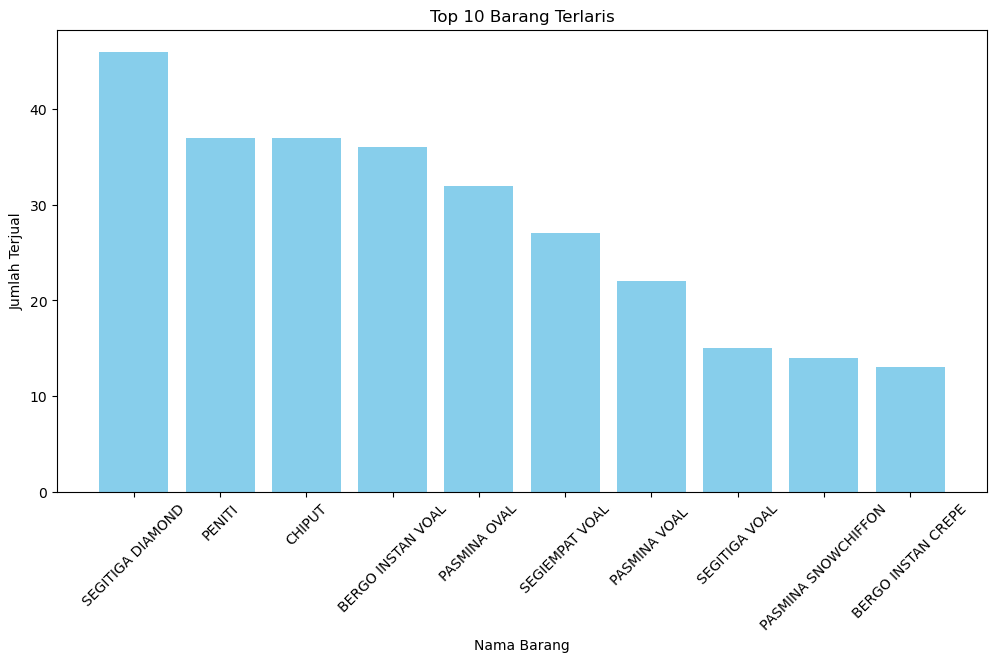

In [38]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_laris['NAMA BARANG'], top_10_laris['COUNT'], color='skyblue')
plt.xlabel('Nama Barang')
plt.ylabel('Jumlah Terjual')
plt.title('Top 10 Barang Terlaris')
plt.xticks(rotation=45)
plt.show()

# 22. Visualization of Predicted Top Items for Next Month

 membuat visualisasi bar chart untuk menampilkan barang-barang yang diprediksi paling banyak terjual bulan depan berdasarkan metode K-Means dan Naive Bayes.

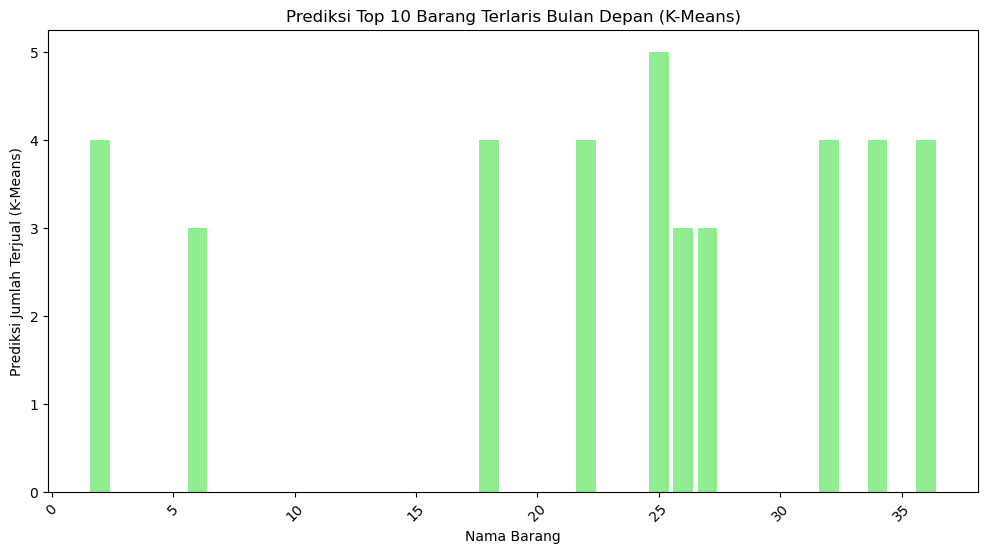

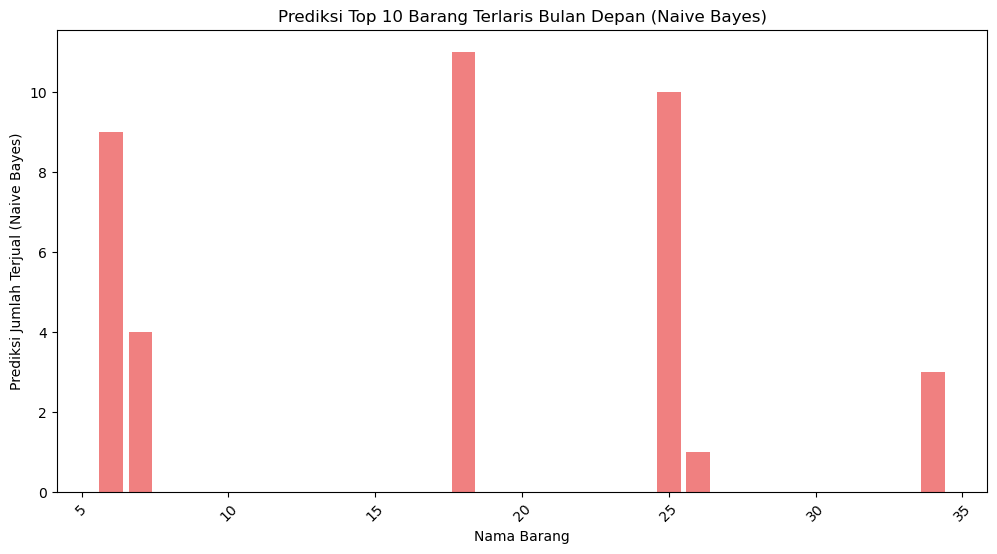

In [39]:
# Visualization: Predicted Top Items for Next Month (K-Means)
pred_top_items_kmeans = df_next_month.groupby('PREDIKSI_KMEANS').size().reset_index(name='COUNT')
pred_top_items_kmeans = pred_top_items_kmeans.sort_values(by='COUNT', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(pred_top_items_kmeans['PREDIKSI_KMEANS'], pred_top_items_kmeans['COUNT'], color='lightgreen')
plt.xlabel('Nama Barang')
plt.ylabel('Prediksi Jumlah Terjual (K-Means)')
plt.title('Prediksi Top 10 Barang Terlaris Bulan Depan (K-Means)')
plt.xticks(rotation=45)
plt.show()

# Visualization: Predicted Top Items for Next Month (Naive Bayes)
pred_top_items_nb = df_next_month_nb.groupby('PREDIKSI_NB').size().reset_index(name='COUNT')
pred_top_items_nb = pred_top_items_nb.sort_values(by='COUNT', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(pred_top_items_nb['PREDIKSI_NB'], pred_top_items_nb['COUNT'], color='lightcoral')
plt.xlabel('Nama Barang')
plt.ylabel('Prediksi Jumlah Terjual (Naive Bayes)')
plt.title('Prediksi Top 10 Barang Terlaris Bulan Depan (Naive Bayes)')
plt.xticks(rotation=45)
plt.show()

# 23. Diskusi Hasil

1. Eksplorasi Data

Pada tahap awal, data dieksplorasi dan dibersihkan untuk memastikan kualitas dan kelengkapannya. Dengan menghapus baris yang memiliki nilai yang hilang dan mengekstrak bulan dari kolom TANGGAL, kita mendapatkan data yang siap untuk dianalisis lebih lanjut. Data yang bersih dan terstruktur sangat penting dalam analisis data karena data yang tidak bersih dapat mengarah pada hasil yang tidak akurat dan tidak dapat diandalkan.

2. Identifikasi Barang Terlaris

Setelah eksplorasi data, langkah selanjutnya adalah mengidentifikasi barang-barang terlaris. Dengan mengelompokkan data berdasarkan KODE dan NAMA BARANG, serta menghitung jumlah kemunculan setiap kelompok, kita dapat mengetahui barang-barang mana yang paling sering terjual. Hasilnya menunjukkan bahwa beberapa barang tertentu mendominasi penjualan, yang dapat memberikan wawasan bagi strategi penjualan dan pengelolaan persediaan di masa mendatang.

3. Visualisasi Distribusi Penjualan

Distribusi penjualan per bulan divisualisasikan menggunakan plot batang untuk memahami tren penjualan bulanan. Visualisasi ini menunjukkan fluktuasi penjualan sepanjang tahun, yang dapat membantu dalam merencanakan promosi dan strategi pemasaran sesuai dengan musim atau waktu tertentu dalam setahun.

4. Clustering Menggunakan K-Means

Metode K-Means digunakan untuk mengelompokkan data penjualan berdasarkan KODE dan BULAN. Setelah menormalkan fitur-fitur ini, metode Elbow dan silhouette score digunakan untuk menentukan jumlah cluster yang optimal. Hasil clustering divisualisasikan dengan scatter plot, yang menunjukkan bagaimana data terdistribusi ke dalam cluster yang berbeda. Clustering ini membantu dalam mengidentifikasi pola penjualan yang mungkin tidak terlihat dengan analisis sederhana, seperti barang-barang yang cenderung terjual bersamaan atau dalam periode waktu tertentu.

5. Prediksi Menggunakan Naive Bayes

Model Naive Bayes dilatih untuk memprediksi barang mana yang akan terjual berdasarkan KODE dan BULAN. Dengan membagi data menjadi set pelatihan dan pengujian, model ini dievaluasi menggunakan metrik seperti akurasi, laporan klasifikasi, dan matriks kebingungan. Hasil evaluasi menunjukkan seberapa baik model ini dapat memprediksi penjualan di masa mendatang. Meskipun model Naive Bayes sederhana, ia sering kali memberikan hasil yang baik untuk tugas klasifikasi dengan data kategorikal.

6. Prediksi Barang Terlaris Bulan Depan

Dengan menggunakan model K-Means dan Naive Bayes, prediksi barang terlaris untuk bulan depan dibuat. Data bulan depan (misalnya, bulan Agustus) diskalakan dan diprediksi menggunakan kedua model. Hasil prediksi ini divisualisasikan untuk membandingkan barang-barang mana yang diperkirakan akan menjadi terlaris menurut masing-masing metode. Perbandingan ini penting untuk memahami kelebihan dan kekurangan setiap model dan untuk memutuskan model mana yang lebih dapat diandalkan dalam konteks tertentu.

7.Visualisasi Hasil Prediksi

Hasil prediksi barang terlaris bulan depan divisualisasikan dalam bentuk bar chart. Visualisasi ini membantu dalam menyampaikan hasil analisis dengan cara yang mudah dimengerti dan dapat digunakan oleh manajemen untuk pengambilan keputusan. Visualisasi ini menunjukkan barang-barang yang diperkirakan akan paling laris berdasarkan kedua metode, yang dapat membantu dalam perencanaan persediaan dan strategi pemasaran.

8. Kesimpulan

Analisis ini menunjukkan bagaimana teknik machine learning seperti K-Means dan Naive Bayes dapat digunakan untuk mengidentifikasi pola dalam data penjualan dan membuat prediksi yang berguna. Clustering dengan K-Means memberikan wawasan tentang struktur data, sedangkan Naive Bayes menawarkan pendekatan prediksi yang sederhana namun efektif. Kombinasi dari kedua teknik ini memungkinkan prediksi yang lebih komprehensif dan dapat membantu dalam mengoptimalkan strategi penjualan dan pengelolaan persediaan. Namun, penting untuk terus mengevaluasi dan memperbarui model dengan data terbaru untuk memastikan prediksi yang akurat dan relevan.